#### Knn(k nearest neighbour) using the custum function and sklearn
- Data preparation
- Data preprocessing
- Data visulization
- Model(knn)
- Accuracy

In [1]:
## Creating the custum dataset

import numpy as np

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

dist1 = np.random.multivariate_normal(mean_01,cov_01,500)
dist2 = np.random.multivariate_normal(mean_02,cov_02,500)

print("The shape of the dist1 is {}".format(dist1.shape))
print("The shape of the dist2 is {}".format(dist2.shape))

The shape of the dist1 is (500, 2)
The shape of the dist2 is (500, 2)


In [2]:
data = np.zeros((1000,3))
data[:500,:2] = dist1
data[500:,:2] = dist2
data[500:,2:] = 1
np.random.shuffle(data)
X = data[:,:2]
Y = data[:,2:]

print("The shape of the X is {}".format(X.shape))
print("The shape of the Y is {}".format(Y.shape))

The shape of the X is (1000, 2)
The shape of the Y is (1000, 1)


In [3]:
### Divide into train and test
from sklearn.model_selection import train_test_split

X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.2)
print("The size if X_Train is {}".format(X_Train.shape))
print("The size if X_Test is {}".format(X_Test.shape))
print("The size if Y_Train is {}".format(Y_Train.shape))
print("The size if Y_Test is {}".format(Y_Test.shape))

The size if X_Train is (800, 2)
The size if X_Test is (200, 2)
The size if Y_Train is (800, 1)
The size if Y_Test is (200, 1)


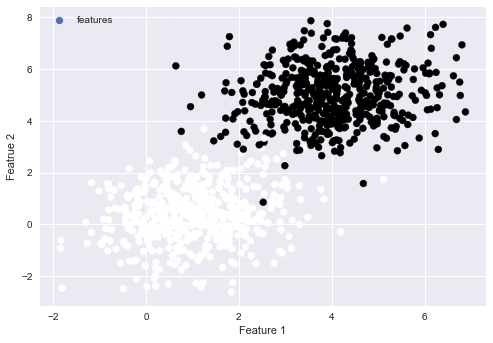

In [7]:
### Data visulization

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],label="features",c=Y[:,0])
plt.xlabel("Feature 1")
plt.ylabel("Featrue 2")
plt.legend()
plt.show()

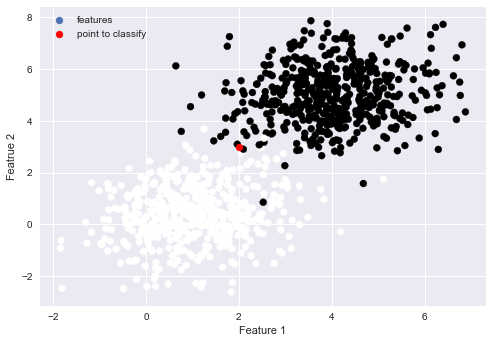

In [6]:
### Point to classify visulize

point_query = np.array([2,3])
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],label="features",c=Y[:,0])
plt.scatter(point_query[0],point_query[1],c="red",label="point to classify")
plt.xlabel("Feature 1")
plt.ylabel("Featrue 2")
plt.legend()
plt.show()

In [125]:
### Knn model

import math
from collections import Counter

def distance(x1,x2):
    """Function return the euclidian distance"""
    return np.sum((x1-x2)**2)

def knnFn(query_point,X,Y,k=6):
    """Function return the prediction"""
    m = X.shape[0]
    vals = []
    for i in range(m):
        d = distance(X[i],query_point)
        vals.append((d,Y[i][0]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    counts = np.unique(vals[:,1],return_counts=True)
    return counts[0][counts[1].argmax()]

In [130]:
### Finding the acc
y_pred = []
for i in range(Y_Test.shape[0]):
    y_pred.append(knnFn(X_Test[i],X_Train,Y_Train))

counts = 0
for i in range(X_Test.shape[0]):
    if Y_Test[i] == y_pred[i]:
        counts += 1
print(counts)

198


In [110]:
## using sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_Train,Y_Train)

c:\users\deepa\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [111]:
knn.score(X_Test,Y_Test)

0.99